In [20]:
import pandas as pd

In [21]:
data = pd.read_csv('data.csv', sep = ";")

In [22]:
data

,title,actor
0,Гранд тур,Джереми Кларксон
1,Гранд тур,Ричард Хаммонд
2,Гранд тур,Джеймс Мэй
3,Гранд тур,Abbie Eaton
4,Гранд тур,Майк Скиннер
...,...,...
135,BBC: Сила искусства,Пол Попплуэлл
136,BBC: Сила искусства,Тим Фрэнсис
137,BBC: Сила искусства,Эндрю Гарфилд
138,BBC: Сила искусства,Саймон Куотерман


In [23]:
movies = set(data["title"])

In [24]:
from itertools import combinations

cast_dict = {}
for movie in movies:
    actors = set(data.loc[data['title'] == movie]["actor"])
    d[movie] = actors 

In [25]:
values = list(cast_dict.values())
keys = list(cast_dict.keys())
cross_list = [] # the list of actors, who appered in more then one movie from data set

l2 = [(i, set(values[i])) for i in range(len(values))]
for (i, a), (j, b) in combinations(l2, 2):
    s = a.intersection(b)
    
    if len(s) > 0:
        for v in s:
            cross_list.append((v, [keys[i], keys[j]]))     
     

In [26]:
cross_list

[('Джеймс Мэй', ['Гранд тур', 'Топ Гир']),
 ('Джереми Кларксон', ['Гранд тур', 'Топ Гир']),
 ('Ричард Хаммонд', ['Гранд тур', 'Топ Гир']),
 ('Радик Мухаметзянов',
  ['Братья по оружию', 'Острые козырьки / Заточенные кепки']),
 ('Антон Савенков', ['Черное зеркало', 'Топ Гир'])]

In [27]:
cross_dict = {}
for entry in cross_list:
    cross_dict.setdefault(entry[0], []).extend(entry[1])     

In [35]:
cross_dict = {k:set(v) for k, v in cross_dict.items()} # removes doubling

In [36]:
cross_dict

{'Джеймс Мэй': {'Гранд тур', 'Топ Гир'},
 'Джереми Кларксон': {'Гранд тур', 'Топ Гир'},
 'Ричард Хаммонд': {'Гранд тур', 'Топ Гир'},
 'Радик Мухаметзянов': {'Братья по оружию',
  'Острые козырьки / Заточенные кепки'},
 'Антон Савенков': {'Топ Гир', 'Черное зеркало'}}

# Новый раздел

In [57]:
values = list(cross_dict.values())
keys = list(cross_dict.keys())
connections_list = [] #the list of actors connections
labels = {}

l2 = [(i, set(values[i])) for i in range(len(values))]
for (i, c), (j, d) in combinations(l2, 2):
    s = c.intersection(d)

    if j != i and len(s) > 0:
        res = (keys[j], keys[i], len(s))
        connections_list.append(res)
    
    if j != i and len(s) == 1:
        res = keys[j], keys[i]
        labels[res] = list(s)[0]

In [58]:
connections_list

[('Джереми Кларксон', 'Джеймс Мэй', 2),
 ('Ричард Хаммонд', 'Джеймс Мэй', 2),
 ('Антон Савенков', 'Джеймс Мэй', 1),
 ('Ричард Хаммонд', 'Джереми Кларксон', 2),
 ('Антон Савенков', 'Джереми Кларксон', 1),
 ('Антон Савенков', 'Ричард Хаммонд', 1)]

In [60]:
import networkx as nx

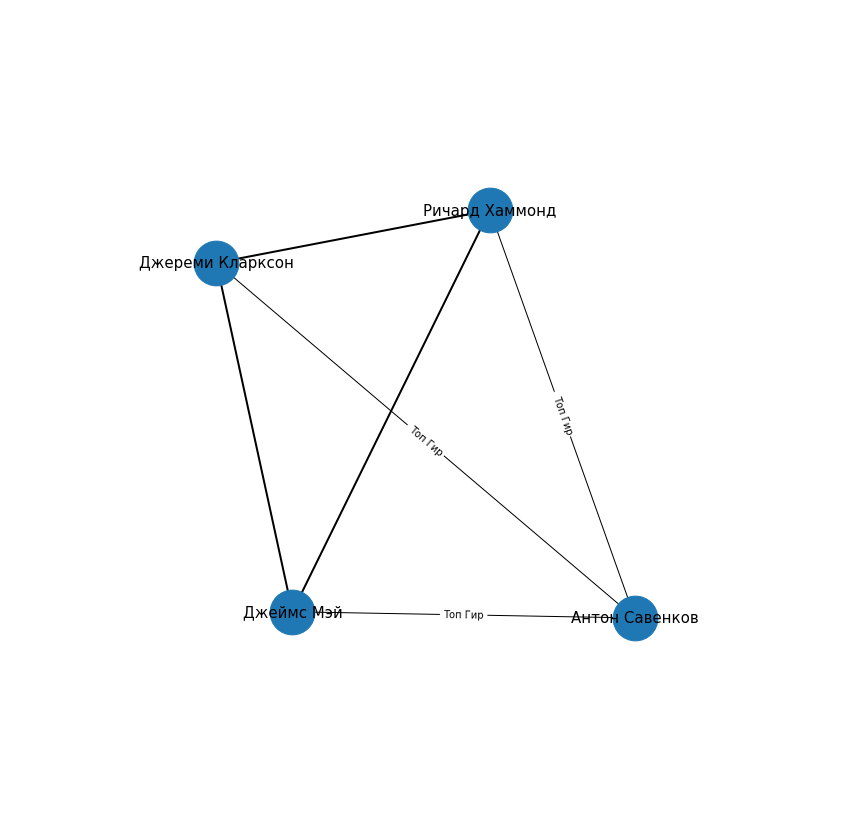

In [61]:
import matplotlib.pyplot as plt
import networkx as nx
plt.rcParams["figure.figsize"] = (15,15)

G = nx.Graph()
G.add_weighted_edges_from(connections_list)

pos = nx.spring_layout(G, seed=30)
weights = [item[-1] for item in connections_list]

plt.figure(1)
nx.draw_networkx_nodes(G, pos, node_size=2000)
nx.draw_networkx_edges(G, pos, width=weights)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_networkx_labels(G, pos, font_size=15, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.5)
plt.axis("off")
plt.show()

In [41]:
G.degree()

DegreeView({'Джереми Кларксон': 3, 'Джеймс Мэй': 3, 'Ричард Хаммонд': 3, 'Антон Савенков': 3})

In [42]:
nx.betweenness_centrality(G)

{'Джереми Кларксон': 0.0,
 'Джеймс Мэй': 0.0,
 'Ричард Хаммонд': 0.0,
 'Антон Савенков': 0.0}

In [43]:
nx.closeness_centrality(G)

{'Джереми Кларксон': 1.0,
 'Джеймс Мэй': 1.0,
 'Ричард Хаммонд': 1.0,
 'Антон Савенков': 1.0}